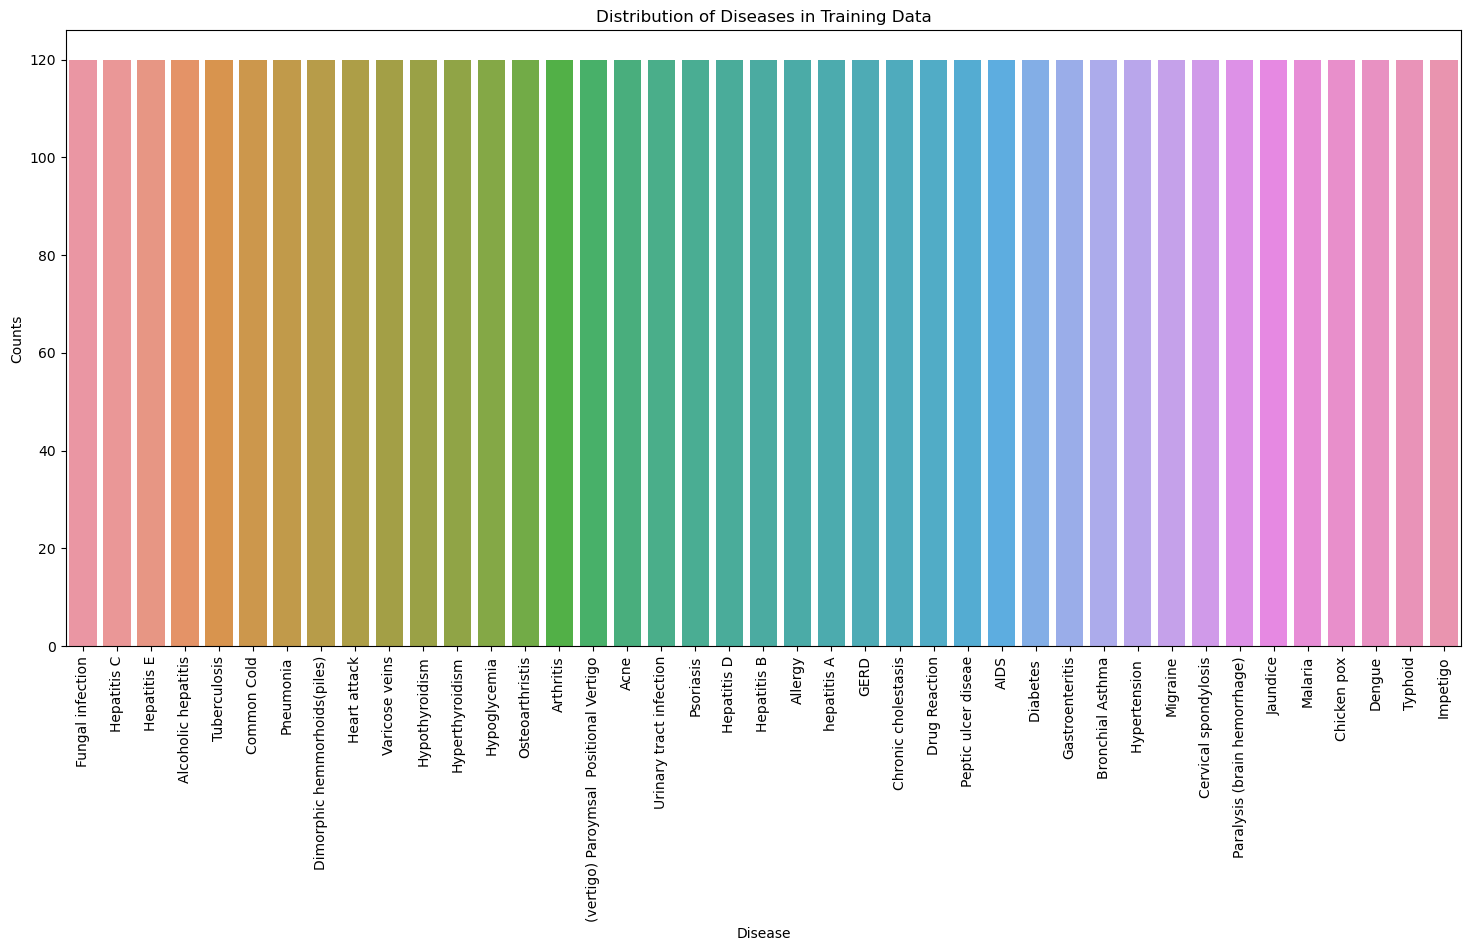

Training set: (3936, 132), (3936,)
Testing set: (984, 132), (984,)
Model: Support Vector Classifier
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Model: Naive Bayes
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
Model: Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000
SVM Accuracy on Train Data: 100.00%
SVM Accuracy on Test Data: 100.00%


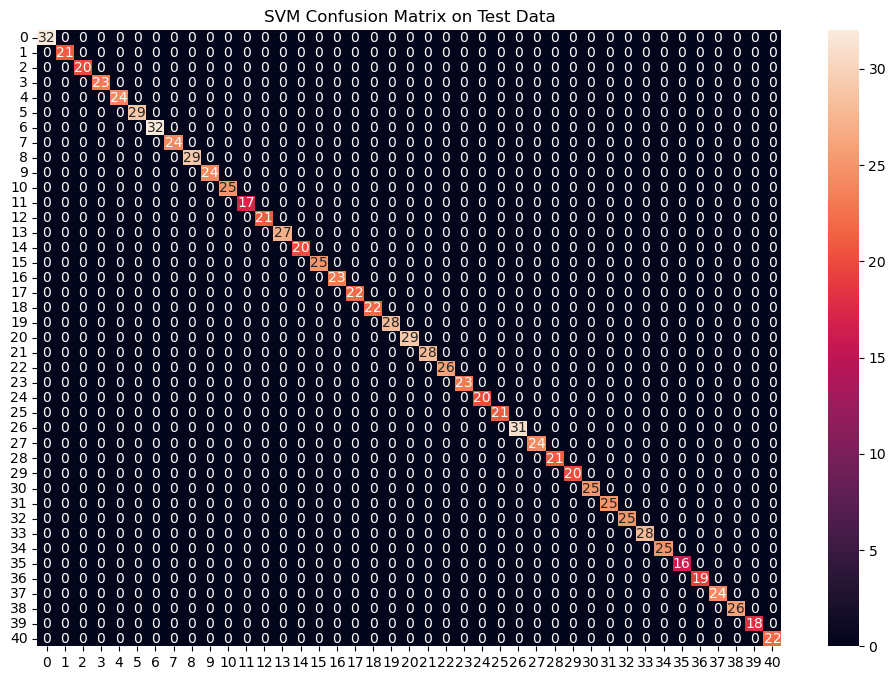

Naive Bayes Accuracy on Train Data: 100.00%
Naive Bayes Accuracy on Test Data: 100.00%


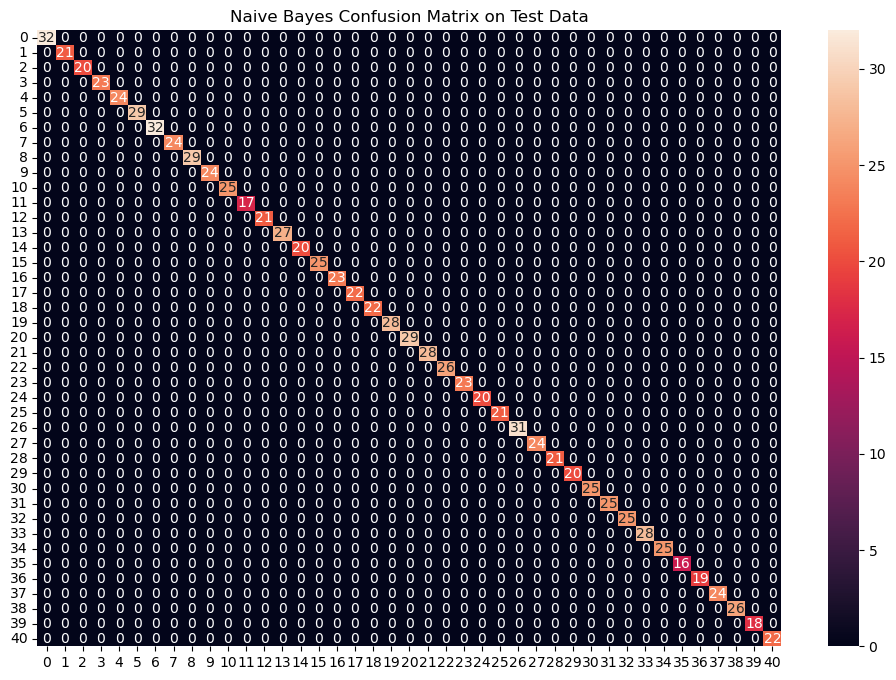

Random Forest Accuracy on Train Data: 100.00%
Random Forest Accuracy on Test Data: 100.00%


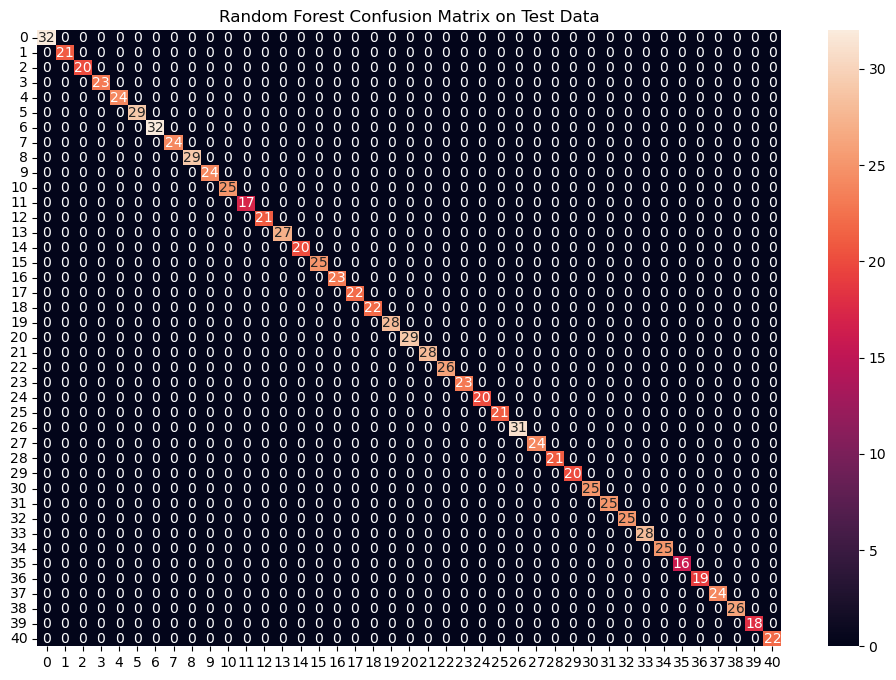

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13392\2853104724.py:118: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]


Accuracy on Test Data using Combined Model: 100.00%


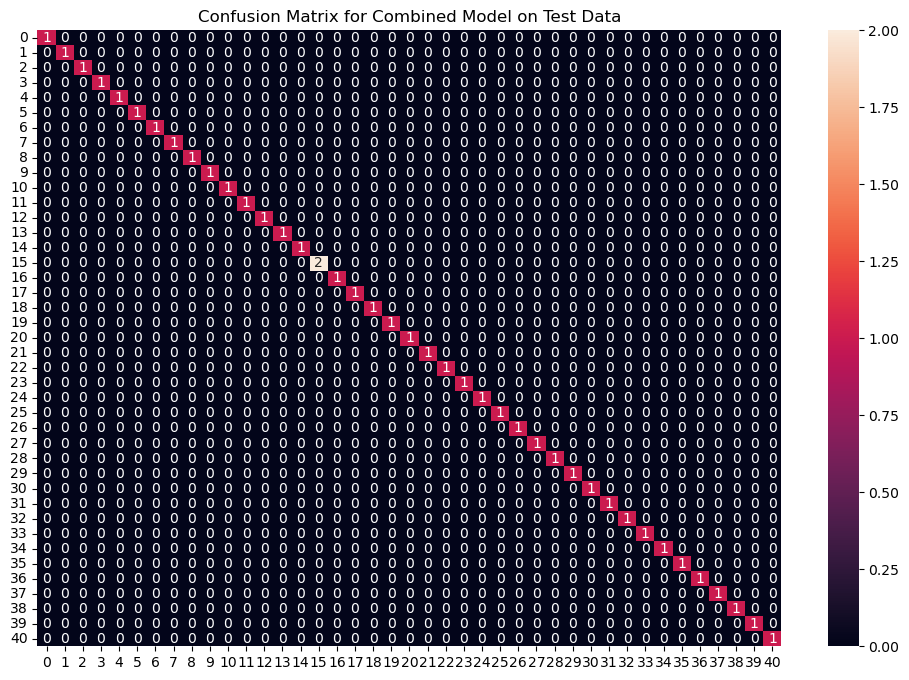

Enter symptoms separated by commas: Chills
{'Random Forest Prediction': 'Allergy', 'Naive Bayes Prediction': 'Allergy', 'SVM Prediction': 'Allergy', 'Final Prediction': 'Allergy'}


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13392\2853104724.py:156: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# For inline plots in Jupyter notebooks
%matplotlib inline

# Load the training dataset and drop any columns with all missing values
DATA_PATH = "C:\\Users\\KIIT\\Downloads\\Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Visualize the distribution of diseases in the dataset to check for balance
disease_counts = data["prognosis"].value_counts()
plt.figure(figsize=(18, 8))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('Counts')
plt.title('Distribution of Diseases in Training Data')
plt.show()

# Encode target labels with value between 0 and n_classes-1
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Split features and target variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Define a scoring function for cross-validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initialize the models
models = {
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Evaluate the models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("="*60)
    print(f"Model: {model_name}")
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores):.4f}")

# Train and evaluate each model on the test set

# Support Vector Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print(f"SVM Accuracy on Train Data: {accuracy_score(y_train, svm_model.predict(X_train)) * 100:.2f}%")
print(f"SVM Accuracy on Test Data: {accuracy_score(y_test, svm_preds) * 100:.2f}%")
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt="d")
plt.title("SVM Confusion Matrix on Test Data")
plt.show()

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(f"Naive Bayes Accuracy on Train Data: {accuracy_score(y_train, nb_model.predict(X_train)) * 100:.2f}%")
print(f"Naive Bayes Accuracy on Test Data: {accuracy_score(y_test, nb_preds) * 100:.2f}%")
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt="d")
plt.title("Naive Bayes Confusion Matrix on Test Data")
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print(f"Random Forest Accuracy on Train Data: {accuracy_score(y_train, rf_model.predict(X_train)) * 100:.2f}%")
print(f"Random Forest Accuracy on Test Data: {accuracy_score(y_test, rf_preds) * 100:.2f}%")
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix on Test Data")
plt.show()

# Retrain the models on the entire dataset for final predictions
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Load the test data
TEST_DATA_PATH = "C:\\Users\\KIIT\\Downloads\\Testing.csv"
test_data = pd.read_csv(TEST_DATA_PATH).dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Make predictions using all models and combine them using the mode
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test Data using Combined Model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(test_Y, final_preds), annot=True, fmt="d")
plt.title("Confusion Matrix for Combined Model on Test Data")
plt.show()

# Create a dictionary to map symptoms to their corresponding index
symptom_index = {symptom.replace("_", " ").capitalize(): index for index, symptom in enumerate(X.columns)}

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Define a function for disease prediction based on user input
def predict_disease(symptoms):
    symptom_list = symptoms.split(",")
    
    # Prepare input data for prediction
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptom_list:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Symptom '{symptom}' not recognized.")
    
    input_data = np.array(input_data).reshape(1, -1)
    
    # Predict using all models
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # Determine the final prediction by taking the mode of all model predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    
    return {
        "Random Forest Prediction": rf_prediction,
        "Naive Bayes Prediction": nb_prediction,
        "SVM Prediction": svm_prediction,
        "Final Prediction": final_prediction
    }

# Get user input for symptoms
user_symptoms = input("Enter symptoms separated by commas: ")
predictions = predict_disease(user_symptoms)
print(predictions)
